In [175]:
import numpy as np
import matplotlib.pyplot as plt

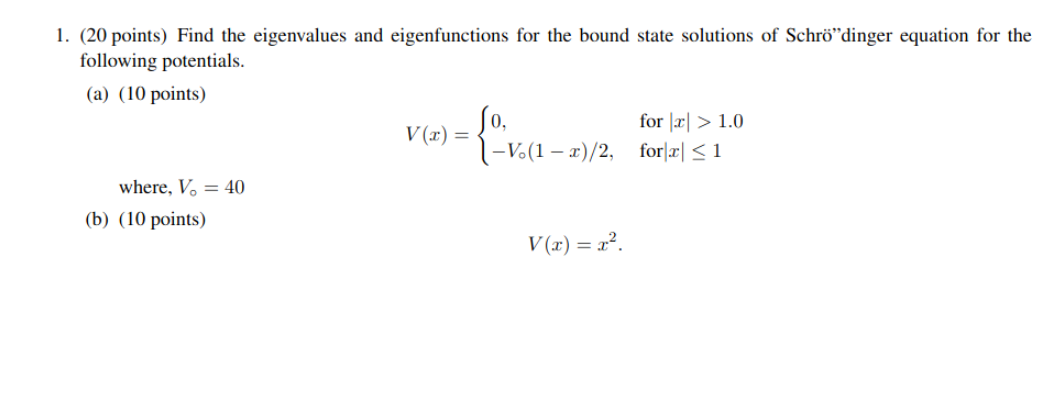

In [206]:
def odefun2(x,y,E):#Schrodinger
    k2 = E - pot(x);
    return np.array([y[1], -k2 * y[0]])
def pot(x):
    if abs(x)>Lo:
        return 0.0
    else:
        return -Vo*(1-x)/2



In [207]:
def rk4(f,x,y,k,h):#RK 
    k1 = h*f(x,y,k)
    k2 = h*f(x + h/2, y + k1/2, k)
    k3 = h*f(x + h/2, y + k2/2, k)
    k4 = h*f(x + h, y + k3, k)
    return y + (k1+2*k2+2*k3+k4)/6
def caller_rk4(f,xlim,yini,k,N):#RK caller
    x1, x2 = xlim
    xs = np.linspace(x1, x2, N)
    h = xs[1] - xs[0]
    y = yini
    ys = np.zeros((N,len(yini)))
    for i in range(N):
        ys[i] = np.array(y)
        y = rk4(f, xs[i], y, k, h)
    return xs, ys
def score2(E,f,ybound):#Score2 
        yini1 = (ybound[0], 1.0e-2);
        xs1, ys1 = caller_rk4(odefun2,xlim,yini1,E,N)
        a = abs(xs1 + Lo);
        n1=np.where(a == np.min(a))[0][0]
        yini2 = (ybound[1], 1.0e-2)
        xs2, ys2 = caller_rk4(odefun2,xlim[-1::-1],yini2,E,N)
        a = abs(xs2 + Lo);
        n2=np.where(a == np.min(a))[0][0]
        ys2 = ys1[n1][0]*ys2/ys2[n2][0]
        return ys1[n1][1] - ys2[n2][1]
Vo = 40.0
Lo = 1.0
xlim = (-2.0, 2.0)
ybound = (0.0, 0.0)
yini = (ybound[0], 0.1) 
N = 129

In [208]:
spectrum = np.linspace(-Vo, 0, 1000);#Score
scores = [score2(E, odefun2, ybound) for E in spectrum]

Text(0, 0.5, 'Score')

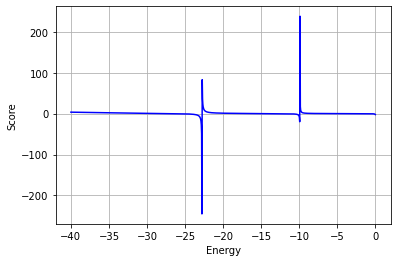

In [209]:
plt.plot(spectrum,scores,'b-');#Score plotter
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score")

(-28.0, -23.0)

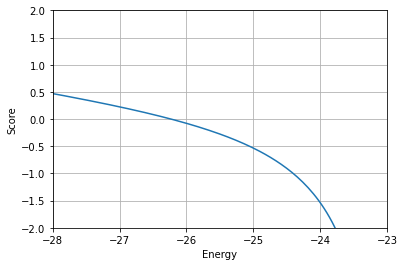

In [210]:
plt.plot(Es,scores);#Plotting
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");
plt.ylim([-2.,2.])
plt.xlim([-28.0,-23.0])

In [211]:
def secant(ks,f,method,ybound):#Root finding_Using _Secant
    k1, k2 = ks
    iter = 0
    while abs(method(k2,f,ybound))>tol and iter<maxiter:
            f1 = method(k1,f,ybound)
            f2 = method(k2,f,ybound)
            k1, k2 = k2, (f2*k1 - f1*k2)/(f2 - f1)
            iter += 1
            print(iter, k1, k2, method(k2,f,ybound))
    if iter == maxiter:
        return iter, None
    else:
        return iter, k2

In [212]:
Eini=(-27,-25)
maxiter=100
tol=10**(-6)
Eeigen = secant(Eini,odefun2,score2,ybound)

1 -25 -26.40749806221855 0.056127524036845844
2 -26.40749806221855 -26.273753617963074 0.014038420692822906
3 -26.273753617963074 -26.229144428776042 -0.00040721857952008556
4 -26.229144428776042 -26.230401949492972 2.948680028147521e-06
5 -26.230401949492972 -26.230392909214558 6.18917694872323e-10


# Eigenvalue for ground state=-26.23

Text(0.5, 1.0, 'ground Eigenfunction')

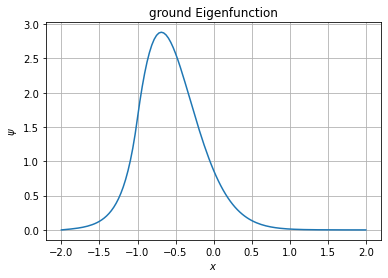

In [213]:
xs, ys = caller_rk4(odefun2, xlim, yini, Eeigen[1], N);#Plotting Ground state
y1 = [y[0] for y in ys]
plt.plot(xs, y1)
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")
plt.title("ground Eigenfunction")

(-25.0, -20.0)

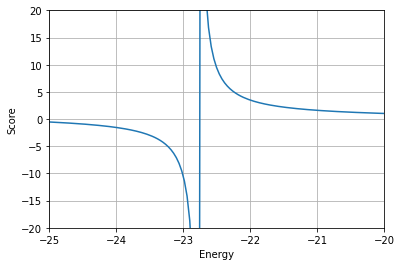

In [214]:
plt.plot(Es,scores);
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");
plt.ylim([-20.,20.])
plt.xlim([-25.0,-20.0])

In [215]:
Eini=(-23,-22)
maxiter=100
tol=10**(-6)
Eeigen = secant(Eini,odefun2,score2,ybound)

1 -22 -22.249670058896854 5.048440338347164
2 -22.249670058896854 -21.43671397180667 2.101409784427468
3 -21.43671397180667 -20.857027455340468 1.4958287348988473
4 -20.857027455340468 -19.4251600789777 0.840672649634334
5 -19.4251600789777 -17.58783952547043 0.460805225385966
6 -17.58783952547043 -15.359043746415617 0.18260999653498652
7 -15.359043746415617 -13.896040979720402 0.02834454867005526
8 -13.896040979720402 -13.627230603197683 -0.0012906539907079628
9 -13.627230603197683 -13.638937666219125 2.3400371969711786e-05
10 -13.638937666219125 -13.638729189585922 2.1055730631269753e-08


#Thus , one Energy eigenvalue is = (-13.638937)

Text(0.5, 1.0, 'excited Eigenfunction')

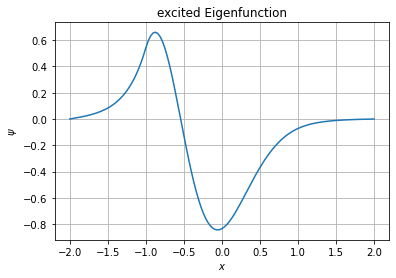

In [216]:
xs, ys = caller_rk4(odefun2, xlim, yini, Eeigen[1], N);#plotting excited state
y1 = [y[0] for y in ys]
plt.plot(xs, y1)
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")
plt.title("excited Eigenfunction")

(-15.0, -5.0)

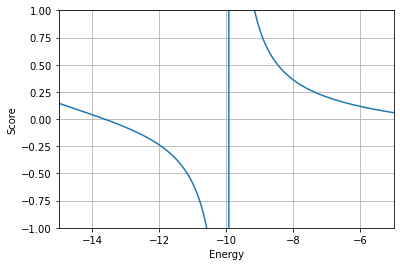

In [217]:
plt.plot(Es,scores);
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");
plt.ylim([-1.,1.])
plt.xlim([-15.0,-5.0])

In [218]:
Eini=(-12,-8)
maxiter=100
tol=10**(-6)
Eeigen = secant(Eini,odefun2,score2,ybound)

1 -8 -10.409312345796165 -1.3738002707520396
2 -10.409312345796165 -8.500725316485712 0.5127504219830362
3 -8.500725316485712 -9.01946505056171 0.8399127996733313
4 -9.01946505056171 -7.687722246191892 0.29786873544131387
5 -7.687722246191892 -6.955891438981153 0.19809047700090326
6 -6.955891438981153 -5.50298259941758 0.08541428030944664
7 -5.50298259941758 -4.401603900717098 0.030579828693445294
8 -4.401603900717098 -3.787392014935382 0.004798914909851765
9 -3.787392014935382 -3.6730612894526486 0.00018095731493904949
10 -3.6730612894526486 -3.668581174450904 6.560905843507048e-07


#Energy eigenvalue=(-3.67306)

Text(0.5, 1.0, '2nd excited_state Eigenfunction')

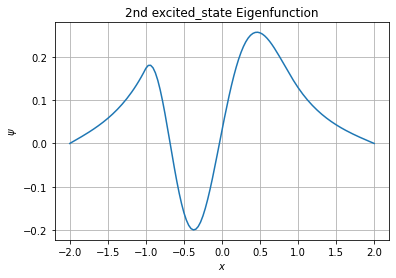

In [219]:
xs, ys = caller_rk4(odefun2, xlim, yini, Eeigen[1], N);
y1 = [y[0] for y in ys];
plt.plot(xs, y1);
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")
plt.title("2nd excited_state Eigenfunction")

#1b)

In [220]:
def odefun2(x,y,E):
    k2 = E - pot(x);
    return np.array([y[1], -k2 * y[0]])
def pot(x):
    return x**2

In [221]:
def score(k,f,ybound):
    xs, ys = caller_rk4(f,xlim,yini,k,N)
    return ys[-1][0] - ybound[1]

In [222]:
xlim=(-3.0,3.0)
spectrum = np.linspace(0,10, 1000);
scores = [score(E, odefun2, ybound) for E in spectrum]

Text(0, 0.5, 'Score')

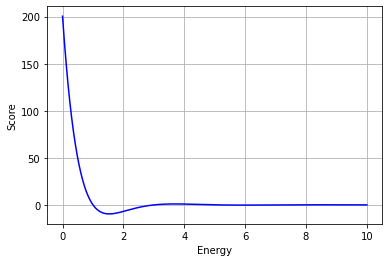

In [223]:
plt.plot(spectrum,scores,'b-');
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score")

(0.5, 1.5)

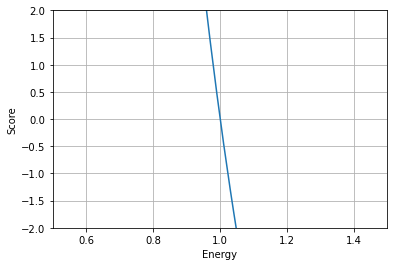

In [224]:
plt.plot(spectrum,scores);
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");
plt.ylim([-2.,2.])
plt.xlim([0.5,1.5])

In [225]:
Eini=(1.0,1.2)
maxiter=100
tol=10**(-6)
Eeigen = secant(Eini,odefun2,score,ybound)

1 1.2 1.001089588948339 -0.013986117326712757
2 1.001089588948339 1.0006612820685705 0.005506941136397231
3 1.0006612820685705 1.0007822821045402 -2.753138366657845e-06
4 1.0007822821045402 1.0007822216420492 -5.41520731901779e-10


# Energy_ground=1.0007

Text(0.5, 1.0, 'Ground state Eigenfunction')

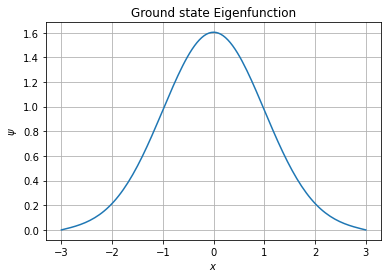

In [226]:
xs, ys = caller_rk4(odefun2, xlim, yini, Eeigen[1], N);
y1 = [y[0] for y in ys]
plt.plot(xs, y1)
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")
plt.title("Ground state Eigenfunction")

(2.0, 4.0)

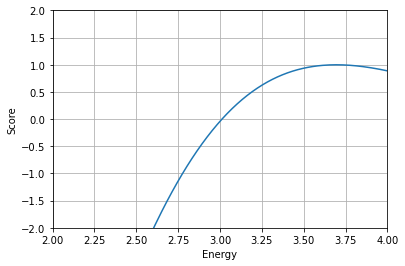

In [227]:
plt.plot(spectrum,scores);
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");
plt.ylim([-2.,2.])
plt.xlim([2,4])

In [228]:
Eini=(3.00,3.75)
maxiter=100
tol=10**(-6)
Eeigen = secant(Eini,odefun2,score,ybound)

1 3.75 3.030243003530041 0.06020092411288465
2 3.030243003530041 2.9838554152791996 -0.09882882595816436
3 2.9838554152791996 3.0126829200939476 0.0017598856296601349
4 3.0126829200939476 3.0121785582161427 4.9865480419580485e-05
5 3.0121785582161427 3.012163850642461 -2.6481250740839624e-08


# Energy_1st_Excited=3.01

Text(0.5, 1.0, 'First Excited  state Eigenfunction')

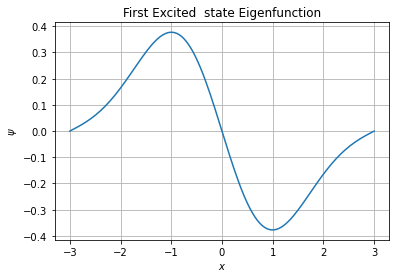

In [229]:
xs, ys = caller_rk4(odefun2, xlim, yini, Eeigen[1], N);
y1 = [y[0] for y in ys]
plt.plot(xs, y1)
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")
plt.title("First Excited  state Eigenfunction")

(4.5, 5.5)

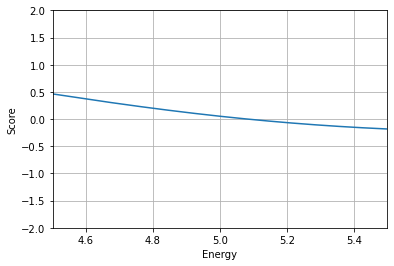

In [230]:
plt.plot(spectrum,scores);
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");
plt.ylim([-2.,2.])
plt.xlim([4.5,5.5])

In [231]:
Eini=(5.00,5.20)
maxiter=100
tol=10**(-6)
Eeigen = secant(Eini,odefun2,score,ybound)

1 5.2 5.088694537714779 -0.0038515799445968486
2 5.088694537714779 5.0817179505545615 0.00032478151939535106
3 5.0817179505545615 5.082260496164568 -1.3596028113150097e-06
4 5.082260496164568 5.0822582344242155 -4.755918324092501e-10


# Energy_2ndExcited=5.08

Text(0.5, 1.0, 'Second Excited  state Eigenfunction')

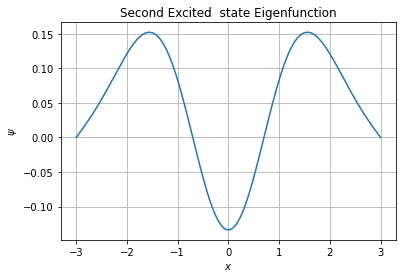

In [232]:
xs, ys = caller_rk4(odefun2, xlim, yini, Eeigen[1], N);
y1 = [y[0] for y in ys]
plt.plot(xs, y1)
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")
plt.title("Second Excited  state Eigenfunction")

(6.0, 8.0)

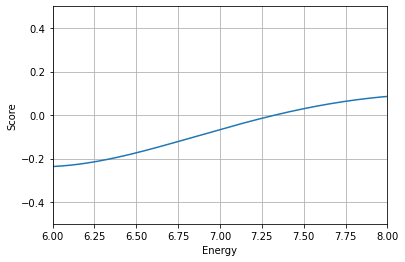

In [233]:
plt.plot(spectrum,scores);
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");
plt.ylim([-0.5,0.5])
plt.xlim([6,8])

In [234]:
Eini=(6.75,7.25)
maxiter=100
tol=10**(-6)
Eeigen = secant(Eini,odefun2,score,ybound)

1 7.25 7.319529889952934 -0.0016460419015047753
2 7.319529889952934 7.32820486050781 -4.533287469440407e-05
3 7.32820486050781 7.32845053998269 -1.5212261064625338e-07


Text(0.5, 1.0, 'Third Excited  state Eigenfunction')

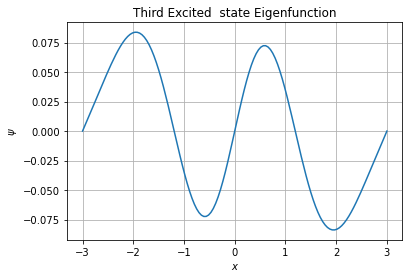

In [235]:
xs, ys = caller_rk4(odefun2, xlim, yini, Eeigen[1], N);
y1 = [y[0] for y in ys]
plt.plot(xs, y1)
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")
plt.title("Third Excited  state Eigenfunction")